In [1]:
from gal4H0 import *
from scipy.stats import gaussian_kde
np.random.seed(1) # Random seed
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25) # True cosmology

In [2]:
# We generate multiple H0 posterior for 200 events, different LOS and dl errors

LOSf=['MICECAT_LOS/micecat_451.csv','MICECAT_LOS/micecat_455.csv',
     'MICECAT_LOS/micecat_901.csv','MICECAT_LOS/micecat_905.csv']

sigmas=[0.1,0.2,0.3]
Ngw=200
zcut_rate=1.4
dl_thr=1550
H0_array=np.linspace(40,120,4000)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    galaxies_list = np.genfromtxt(ilos,skip_header=1)
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
        posterior_matrix,combined=galaxy_catalog_analysis_accurate_redshift(H0_array,galaxies_list,zcut_rate,gw_obs_dl,sigma_dl,dl_thr)

        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined

0.1
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [01:49, 36.55it/s]


0.2
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [01:48, 36.98it/s]


0.3
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [01:50, 36.22it/s]


0.1
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [3:32:19,  3.18s/it]  


0.2
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [44:26,  1.50it/s]


0.3
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [38:13,  1.74it/s]


0.1
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [00:59, 66.97it/s]


0.2
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [01:03, 63.14it/s]


0.3
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [01:05, 60.84it/s]


0.1
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [19:21,  3.44it/s]


0.2
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [25:44,  2.59it/s] 


0.3
You detected 200 binaries out of 100000 simulated


running on H0: 4000it [15:17,  4.36it/s]


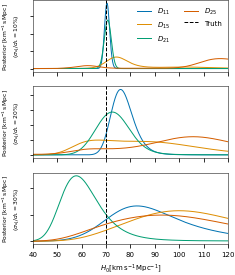

In [3]:
fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)
colors=[pal[0],pal[1],pal[2],pal[3]]
lines=['solid','--',':']

labels_1=[r'$D_{11}$',
        r'$D_{15}$',
        r'$D_{21}$',
        r'$D_{25}$']

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']


for i in range(len(colors)):
    for j in range(len(lines)):
        ilos=LOSf[i]
        sigma=sigmas[j]
        ax[j].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])    
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=2)

ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
#plt.tight_layout()
plt.savefig('figures_paper/big_fig_acc_redshift.pdf')

